In [ ]:
1. Save Type

maxrange

data

diffmax -> CIC

pge

2. Output redirect

3. cmd and log file

In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, version_information

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
a = np.load('tempstats_20160614_212418.npy')

In [16]:
b = a[0]['maxlist']

maxlist: [total/interval,16, total/interval]

data: [total/interval,256, 16]

In [17]:
len(b[15])

1

## Corr VS Traces
self._numKeys()=256

self.enabledbytes=16

self._numPerms(bnum)=diffs[bnum]

In [11]:
maxl = a[0]['maxlist']
data = a[0]['data']

enabledlist = []
for bnum in range(0, 16):
    enabledlist.append(bnum)

xrangelist = [0] * 256
newdata = [0] * 256 
for bnum in enabledlist:
    maxdata = maxl[bnum]
    tlist = []
    for m in maxdata:
        tlist.append(m['trace'])
    maxlist = np.zeros((len(data[bnum]), len(tlist)))
    for i, m in enumerate(maxdata):
        for j in range(0, len(data[bnum])):
            maxlist[m['maxes'][j][0], i] = m['maxes'][j][2]

    newdata[bnum] = maxlist
    xrangelist[bnum] = tlist

In [12]:
maxlist.shape

(256L, 200L)

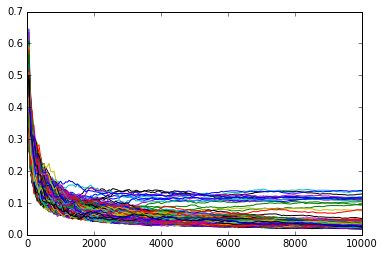

In [13]:
for i in range(16):
    for j in range(256):
        plt.plot(tlist, newdata[i][j])

In [38]:
maxl = a[0]['maxlist']
data = a[0]['data']

enabledlist = []
for bnum in range(0, 16):
    enabledlist.append(bnum)

xrangelist = [0] * 256
newdata = [0] * 256 
for bnum in enabledlist:
    maxdata = maxl[bnum]
    tlist = []
    for m in maxdata:
        tlist.append(m['trace'])
    maxlist = np.zeros((len(data[bnum]), len(tlist)))
    for i, m in enumerate(maxdata):
        for j in range(0, len(data[bnum])):
            maxlist[m['maxes'][j][0], i] = m['maxes'][j][2]

    newdata[bnum] = maxlist
    xrangelist[bnum] = tlist

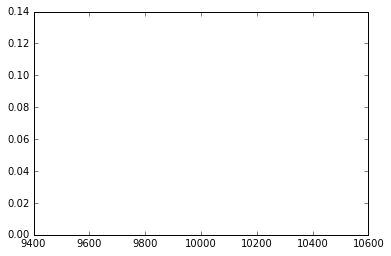

In [39]:
for i in range(16):
    for j in range(256):
        plt.plot(tlist, newdata[i][j])

## Output VS Time
self._numKeys()=256

self.enabledbytes=16

self._numPerms(bnum)=diffs[bnum]

In [40]:
samplepoint = a[0]['xrange']
data = a[0]['data']

In [41]:
len(samplepoint), len(data[0][0])

(256, 396)

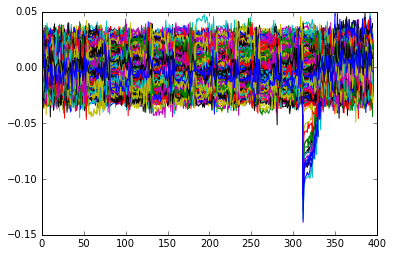

In [42]:
for i in range(16):
    for j in range(256):
        plt.plot(samplepoint[0],data[i][j])

## PGE VS Trace
self._numKeys()=256

self.enabledbytes=16

self._numPerms(bnum)=diffs[bnum]

In [18]:
a = np.load('tempstats_20160614_213012.npy')

In [ ]:
b

In [29]:
allpge = a[99]['pge']

pge: [total/interval, 16]

In [30]:
allpge

OrderedDict([(100,
              [{'pge': 0.0, 'pgesum': 0, 'trials': 1},
               {'pge': 222.0, 'pgesum': 222, 'trials': 1},
               {'pge': 66.0, 'pgesum': 66, 'trials': 1},
               {'pge': 129.0, 'pgesum': 129, 'trials': 1},
               {'pge': 4.0, 'pgesum': 4, 'trials': 1},
               {'pge': 81.0, 'pgesum': 81, 'trials': 1},
               {'pge': 181.0, 'pgesum': 181, 'trials': 1},
               {'pge': 145.0, 'pgesum': 145, 'trials': 1},
               {'pge': 73.0, 'pgesum': 73, 'trials': 1},
               {'pge': 254.0, 'pgesum': 254, 'trials': 1},
               {'pge': 59.0, 'pgesum': 59, 'trials': 1},
               {'pge': 209.0, 'pgesum': 209, 'trials': 1},
               {'pge': 37.0, 'pgesum': 37, 'trials': 1},
               {'pge': 144.0, 'pgesum': 144, 'trials': 1},
               {'pge': 9.0, 'pgesum': 9, 'trials': 1},
               {'pge': 92.0, 'pgesum': 92, 'trials': 1}]),
             (200,
              [{'pge': 32.0, 'pgesum': 3

In [31]:
type(allpge)

collections.OrderedDict

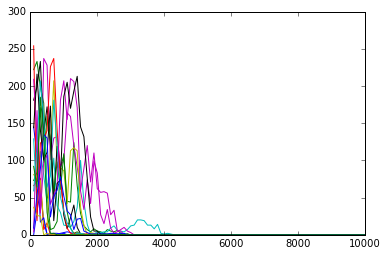

In [32]:
for bnum in range(0, 16):
    trace = []
    pge = []
    for (tnum, plist) in allpge.iteritems():
        if plist[bnum]['pge'] is not None:
            trace.append(tnum)
            pge.append(plist[bnum]['pge'])
    plt.plot(trace, pge)

In [ ]:
from chipwhisperer.common.scripts.base import UserScriptBase
from chipwhisperer.common.api.CWCoreAPI import CWCoreAPI  # Import the ChipWhisperer API
# Imports from Preprocessing
import chipwhisperer.analyzer.preprocessing as preprocessing
# Imports from Capture
from chipwhisperer.analyzer.attacks.cpa import CPA
from chipwhisperer.analyzer.attacks.cpa_algorithms.progressive import CPAProgressive
import chipwhisperer.analyzer.attacks.models.AES128_8bit
# Imports from utilList

In [ ]:
class UserScript(UserScriptBase):
    _name = "CPA with noise"
    _description = "Simple example of attack script using CPA Progressive and random noise"

    def __init__(self, api):
        UserScriptBase.__init__(self, api)
        self.initProject()
        self.initPreprocessing()
        self.initAnalysis()
        self.initReporting()

    def initProject(self):
        pass

    def initPreprocessing(self):
        ppMod0 = preprocessing.AddNoiseRandom.AddNoiseRandom(None, self.api.project().traceManager())
        ppMod0.setEnabled(True)
        ppMod0.setMaxNoise(0.005000)
        ppMod0.init()
        self.traces = ppMod0

    def initAnalysis(self):
        self.attack = CPA()
        self.attack.setAnalysisAlgorithm(CPAProgressive,chipwhisperer.analyzer.attacks.models.AES128_8bit,chipwhisperer.analyzer.attacks.models.AES128_8bit.LEAK_HW_SBOXOUT_FIRSTROUND)
        self.attack.setTraceStart(0)
        self.attack.setTracesPerAttack(50)
        self.attack.setIterations(1)
        self.attack.setReportingInterval(10)
        self.attack.setTargetBytes([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
        self.attack.setTraceSource(self.traces)
        self.attack.setPointRange((0,3000))

    def initReporting(self):
        # Configures the attack observers (usually a set of GUI widgets)
        self.api.resultWidgets["Correlation vs Traces in Attack"].setAnalysisSource(self.attack)
        self.api.resultWidgets["Knownkey Source"].setAnalysisSource(self.attack)
        self.api.resultWidgets["Output vs Point Plot"].setAnalysisSource(self.attack)
        self.api.resultWidgets["PGE vs Trace Plot"].setAnalysisSource(self.attack)
        self.api.resultWidgets["Results Table"].setAnalysisSource(self.attack)
        self.api.resultWidgets["Save to Files"].setAnalysisSource(self.attack)
        self.api.resultWidgets["Trace Output Plot"].setTraceSource(self.traces)

    def run(self):
        self.attack.processTraces()

In [ ]:
api = CWCoreAPI()

In [ ]:
usercommands = UserScript(api) 